In [10]:
from ashlar import fileseries, thumbnail,reg
import matplotlib.pyplot as plt
from ashlar.scripts.ashlar import process_axis_flip
import numpy as np
import pims


readers = []
for i in range(4):
    readers.append(fileseries.FileSeriesReader(
    #     '/run/media/jmamede/Joao/multiplex/ENDO/img1/',
        '/home/jmamede/Data/multiplex/',
        pattern='ENDO-C'+str(i)+'_v{series}_PRJ.ome.tiff',
        overlap=0.075,
        width=30,
        height=20,
        layout='snake',
        direction='horizontal',
        pixel_size=0.10833,
    )
                  )


# check if filenames are indexed properly
print(
    '\n'.join(readers[0].metadata.filename(i, 0) for i in range(80, 120))
)
# it's very likely you'll want `flip_x=False, flip_y=True`
# try not to tweak here for now
# process_axis_flip(c1r, flip_x=False, flip_y=False)


# If using the third channel, pass `channel=2` (0-based indexing in python)
thumbnail_c1r = thumbnail.make_thumbnail(readers[0], channel=3)

plt.figure()
# doing log just for visualization
plt.imshow(np.log(thumbnail_c1r))
# process_axis_flip(c1r, flip_x=False, flip_y=True)

ENDO-C0_v081_PRJ.ome.tiff
ENDO-C0_v082_PRJ.ome.tiff
ENDO-C0_v083_PRJ.ome.tiff
ENDO-C0_v084_PRJ.ome.tiff
ENDO-C0_v085_PRJ.ome.tiff
ENDO-C0_v086_PRJ.ome.tiff
ENDO-C0_v087_PRJ.ome.tiff
ENDO-C0_v088_PRJ.ome.tiff
ENDO-C0_v089_PRJ.ome.tiff
ENDO-C0_v090_PRJ.ome.tiff
ENDO-C0_v091_PRJ.ome.tiff
ENDO-C0_v092_PRJ.ome.tiff
ENDO-C0_v093_PRJ.ome.tiff
ENDO-C0_v094_PRJ.ome.tiff
ENDO-C0_v095_PRJ.ome.tiff
ENDO-C0_v096_PRJ.ome.tiff
ENDO-C0_v097_PRJ.ome.tiff
ENDO-C0_v098_PRJ.ome.tiff
ENDO-C0_v099_PRJ.ome.tiff
ENDO-C0_v100_PRJ.ome.tiff
ENDO-C0_v101_PRJ.ome.tiff
ENDO-C0_v102_PRJ.ome.tiff
ENDO-C0_v103_PRJ.ome.tiff
ENDO-C0_v104_PRJ.ome.tiff
ENDO-C0_v105_PRJ.ome.tiff
ENDO-C0_v106_PRJ.ome.tiff
ENDO-C0_v107_PRJ.ome.tiff
ENDO-C0_v108_PRJ.ome.tiff
ENDO-C0_v109_PRJ.ome.tiff
ENDO-C0_v110_PRJ.ome.tiff
ENDO-C0_v111_PRJ.ome.tiff
ENDO-C0_v112_PRJ.ome.tiff
ENDO-C0_v113_PRJ.ome.tiff
ENDO-C0_v114_PRJ.ome.tiff
ENDO-C0_v115_PRJ.ome.tiff
ENDO-C0_v116_PRJ.ome.tiff
ENDO-C0_v117_PRJ.ome.tiff
ENDO-C0_v118_PRJ.ome.tiff
ENDO-C0_v119

KeyboardInterrupt: 

In [2]:
aligner0 = reg.EdgeAligner(readers[0], channel=3, filter_sigma=1, verbose=True)
aligner0.run()

    assembling thumbnail 600/600
    quantifying alignment error 1000/1000
    aligning edge 1150/1150


/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


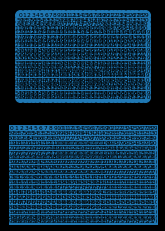

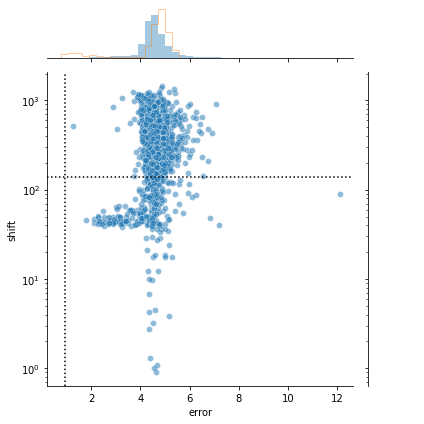

In [3]:
reg.plot_edge_quality(aligner0, img=aligner0.reader.thumbnail)
# plt.gca().suptitle('c1e')

# # plot_edge_scatter function requires seaborn
reg.plot_edge_scatter(aligner0)
# plt.gca().suptitle('c1e')

In [4]:
mosaic_args = {}
#if args.output_channels:
# mosaic_args['channels'] = 4
#pyramid
mosaic_args['tile_size'] = 2048

# if args.quiet is False:
mosaic_args['verbose'] = True
# mosaic_args['flip_mosaic_x'] = False
# mosaic_args['flip_mosaic_y'] = False


In [ ]:
aligners = list()
aligners.append(aligner0)
del aligner0

mosaic = reg.Mosaic(
        aligners[0],aligners[0].mosaic_shape,'test0.ome.tif',**mosaic_args
    )
output = mosaic.run(mode='write')

for j in range(1,4):
    aligners.append(
        reg.LayerAligner(readers[j], aligners[0], channel=3, filter_sigma=1, verbose=True)
    )
    aligners[j].run()
    mosaic = reg.Mosaic(
        aligners[j], aligners[0].mosaic_shape,'test'+str(j)+'.ome.tif',**mosaic_args
    )
    mosaic.run(mode='write')

In [35]:
#filepath here:"C.ome.tif" is needed to call Mosaic but mode='return' shouldn't use it.
# mosaic = reg.Mosaic(
#         c1e, c1e.mosaic_shape,'C.ome.tif',**mosaic_args
#     )
# output = mosaic.run(mode='return')
# array = np.array(output)

In [9]:
# ARRAY.shape